In [1]:
###################
# DATA PROCESSING #
###################

import numpy
import os
import matplotlib.pyplot as plt
import json
import pandas as pd 
import seaborn as sns
from datetime import datetime

folder_1 = "Scrape on 2017-11-12"
folder_2 = "Scrape on 2017-11-16"
folder_3 = "Scrape on 2017-11-21"
folder_4 = "Scrape on 2017-11-22"

file_names_nov_12 = [ folder_1+"/"+file for file in os.listdir(folder_1)]
file_names_nov_16 = [folder_2+"/"+file for file in os.listdir(folder_2)]
file_names_nov_21 = [folder_3+"/"+file for file in os.listdir(folder_3)]
file_names_nov_22 = [folder_4+"/"+file for file in os.listdir(folder_4)]
data_nov_12 = []
data_nov_16 = []
data_nov_21 = []
data_nov_22 = []


def computeDistanceFromBookingDate(date,flight):
    date_format = "%m%d%Y"
    travel_date = flight['departure_date']
    year = '20' + travel_date[-2:]
    d0 = datetime.strptime(travel_date[:-2]+year, date_format)
    d1 = datetime.strptime(date, date_format)
    if ("days" in str(d0-d1)):
        difference = int(str((d0-d1)).split("days")[0])
    else:
        difference = int(str((d0-d1)).split("day")[0])
    return difference

# Convert flight duration into minutes
def convertToMinutes(duration):
    minutes = 0
    duration = duration.split()
    days = int(duration[0])
    hours = days*24+int(duration[2])
    minutes = 60*hours+int(duration[4])
    return minutes

for file in file_names_nov_12:
    json_file =  open(file,'r')
    data = json.load(json_file)
    for flight in data:
        flight['minutes'] = convertToMinutes(flight['flight duration'])
        flight['departure_date'] = file.split("/")[1].split("-")[0]
        flight['booking date'] = '11122017'
        flight['date difference'] = computeDistanceFromBookingDate(flight['booking date'], flight)
        data_nov_12.append(flight)
    json_file.close()
    
for file in file_names_nov_16:
    json_file =  open(file,'r')
    data = json.load(json_file)
    for flight in data:
        flight['minutes'] = convertToMinutes(flight['flight duration'])
        flight['departure_date'] = file.split("/")[1].split("-")[0]
        flight['booking date'] = '11162017'
        flight['date difference'] = computeDistanceFromBookingDate(flight['booking date'], flight)
        data_nov_16.append(flight)
    json_file.close()

for file in file_names_nov_21:
    json_file =  open(file,'r')
    data = json.load(json_file)
    for flight in data:
        flight['minutes'] = convertToMinutes(flight['flight duration'])
        flight['departure_date'] = file.split("/")[1].split("-")[0]
        flight['booking date'] = '11212017'
        flight['date difference'] = computeDistanceFromBookingDate(flight['booking date'], flight)
        data_nov_21.append(flight)
    json_file.close()    

for file in file_names_nov_22:
    json_file =  open(file,'r')
    data = json.load(json_file)
    for flight in data:
        flight['minutes'] = convertToMinutes(flight['flight duration'])
        flight['departure_date'] = file.split("/")[1].split("-")[0]
        flight['booking date'] = '11222017'
        flight['date difference'] = computeDistanceFromBookingDate(flight['booking date'], flight)
        data_nov_22.append(flight)
    json_file.close()   
    
pd_data_nov_12 = pd.read_json(json.dumps(data_nov_12))
pd_data_nov_16 = pd.read_json(json.dumps(data_nov_16))
pd_data_nov_21 = pd.read_json(json.dumps(data_nov_21))
pd_data_nov_22 = pd.read_json(json.dumps(data_nov_22))

In [2]:
all_data = data_nov_12 + data_nov_16 + data_nov_21 + data_nov_22
pd_all_data = pd.read_json(json.dumps(all_data))
pd_all_data.describe()

,booking date,date difference,departure_date,minutes,ticket price
count,7.203700e+04,72037.000000,72037.000000,72037.000000,72037.000000
mean,1.118344e+07,90.289740,51000.835987,373.343615,274.895530
std,4.176296e+04,51.964237,39952.469405,398.496722,224.389592
min,1.112202e+07,1.000000,10118.000000,82.000000,32.200000
25%,1.112202e+07,45.000000,21418.000000,185.000000,140.110000
50%,1.121202e+07,90.000000,33118.000000,230.000000,207.200000
75%,1.122202e+07,135.000000,51818.000000,404.000000,341.420000
max,1.122202e+07,180.000000,123117.000000,3104.000000,2876.800000


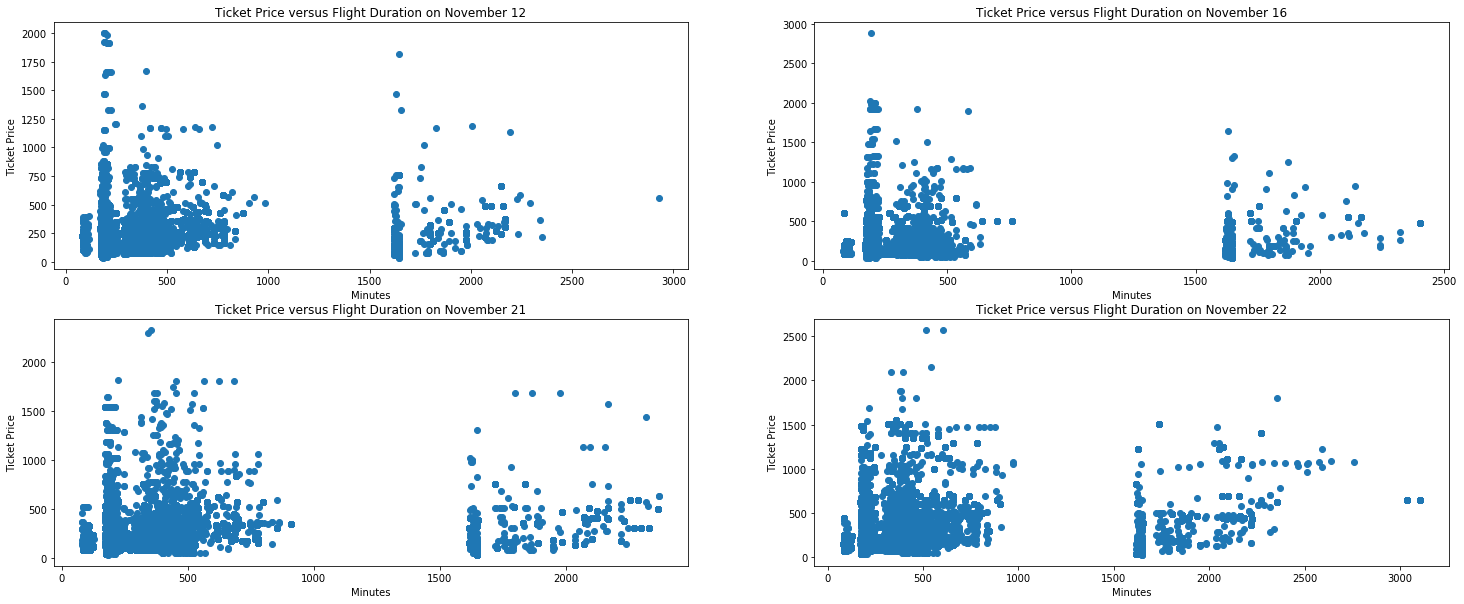

In [3]:
plt.figure(figsize=(25,10))
plt.subplot("221"), plt.scatter(pd_data_nov_12['minutes'],pd_data_nov_12['ticket price'])
plt.title("Ticket Price versus Flight Duration on November 12")
plt.xlabel("Minutes")
plt.ylabel("Ticket Price")
plt.subplot("222"), plt.scatter(pd_data_nov_16['minutes'],pd_data_nov_16['ticket price'])
plt.title("Ticket Price versus Flight Duration on November 16")
plt.xlabel("Minutes")
plt.ylabel("Ticket Price")
plt.subplot("223"), plt.scatter(pd_data_nov_21['minutes'],pd_data_nov_21['ticket price'])
plt.title("Ticket Price versus Flight Duration on November 21")
plt.xlabel("Minutes")
plt.ylabel("Ticket Price")
plt.subplot("224"), plt.scatter(pd_data_nov_22['minutes'],pd_data_nov_22['ticket price'])
plt.title("Ticket Price versus Flight Duration on November 22")
plt.xlabel("Minutes")
plt.ylabel("Ticket Price")
plt.show()

In [8]:
mia_nyc_nov_12_flights = []
for flight in data_nov_12:
    if (flight['timings'][0]['arrival_airport'] == "New York, NY (LGA-LaGuardia)" and flight['timings'][len(flight['timings'])-1]['departure_airport'] == "Miami, FL (MIA-Miami Intl.)"):
        if (flight['airline'] == "Delta" and flight['plane code'] == '320'):
            mia_nyc_nov_12_flights.append(flight)

mia_nyc_nov_16_flights = []
for flight in data_nov_16:
    if (flight['timings'][0]['arrival_airport'] == "New York, NY (LGA-LaGuardia)" and flight['timings'][len(flight['timings'])-1]['departure_airport'] == "Miami, FL (MIA-Miami Intl.)"):
        if (flight['airline'] == "Delta" and flight['plane code'] == '320'):
            mia_nyc_nov_16_flights.append(flight)

mia_nyc_nov_21_flights = []
for flight in data_nov_21:
    if (flight['timings'][0]['arrival_airport'] == "New York, NY (LGA-LaGuardia)" and flight['timings'][len(flight['timings'])-1]['departure_airport'] == "Miami, FL (MIA-Miami Intl.)"):
        if (flight['airline'] == "Delta" and flight['plane code'] == '320'):
            mia_nyc_nov_21_flights.append(flight)

mia_nyc_nov_22_flights = []
for flight in data_nov_22:
    if (flight['timings'][0]['arrival_airport'] == "New York, NY (LGA-LaGuardia)" and flight['timings'][len(flight['timings'])-1]['departure_airport'] == "Miami, FL (MIA-Miami Intl.)"):
        if (flight['airline'] == "Delta" and flight['plane code'] == '320'):
            mia_nyc_nov_22_flights.append(flight)
            
            
pd_mia_nyc_nov_12_flights = pd.read_json(json.dumps(mia_nyc_nov_12_flights))
pd_mia_nyc_nov_16_flights = pd.read_json(json.dumps(mia_nyc_nov_16_flights))
pd_mia_nyc_nov_21_flights = pd.read_json(json.dumps(mia_nyc_nov_21_flights))
pd_mia_nyc_nov_22_flights = pd.read_json(json.dumps(mia_nyc_nov_22_flights))

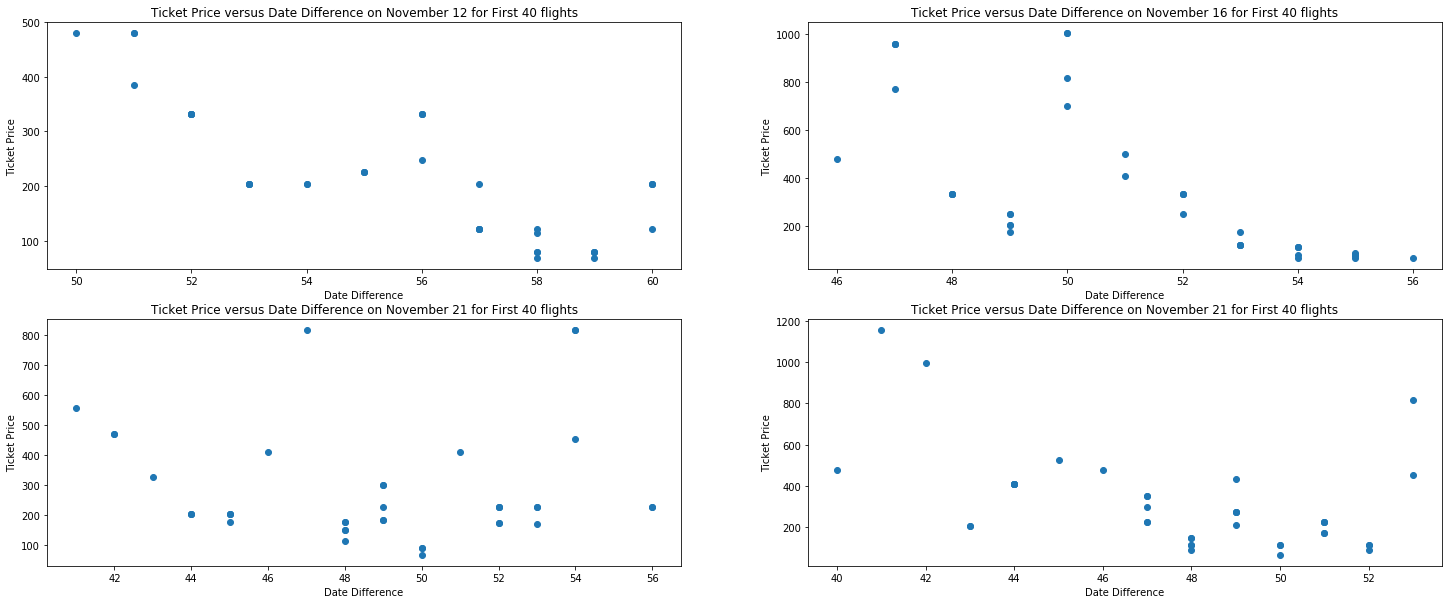

In [5]:
plt.figure(figsize=(25,10))
plt.subplot("221"), plt.scatter(pd_mia_nyc_nov_12_flights['date difference'][:40],pd_mia_nyc_nov_12_flights['ticket price'][:40])
plt.title("Ticket Price versus Date Difference on November 12 for First 40 flights")
plt.xlabel("Date Difference")
plt.ylabel("Ticket Price")
plt.subplot("222"), plt.scatter(pd_mia_nyc_nov_16_flights['date difference'][:40],pd_mia_nyc_nov_16_flights['ticket price'][:40])
plt.title("Ticket Price versus Date Difference on November 16 for First 40 flights")
plt.xlabel("Date Difference")
plt.ylabel("Ticket Price")
plt.subplot("223"), plt.scatter(pd_mia_nyc_nov_21_flights['date difference'][:40],pd_mia_nyc_nov_21_flights['ticket price'][:40])
plt.title("Ticket Price versus Date Difference on November 21 for First 40 flights")
plt.xlabel("Date Difference")
plt.ylabel("Ticket Price")
plt.subplot("224"), plt.scatter(pd_mia_nyc_nov_22_flights['date difference'][:40],pd_mia_nyc_nov_22_flights['ticket price'][:40])
plt.title("Ticket Price versus Date Difference on November 21 for First 40 flights")
plt.xlabel("Date Difference")
plt.ylabel("Ticket Price")
plt.show()

In [6]:
nov_23_flights = []

for flight in data_nov_12:
    if ("New York, NY" in flight['timings'][0]['arrival_airport'] and "Miami, FL" in flight['timings'][len(flight['timings'])-1]['departure_airport']):
        if (flight['departure_date'] == '112317'):
            nov_23_flights.append(flight)

nyc_yul_nov_16_flights = []
for flight in data_nov_16:
    if ("New York, NY" in flight['timings'][0]['arrival_airport'] and "Miami, FL" in flight['timings'][len(flight['timings'])-1]['departure_airport']):
        if (flight['departure_date'] == '112317'):
            nov_23_flights.append(flight)

nyc_yul_nov_21_flights = []
for flight in data_nov_21:
    if ("New York, NY" in flight['timings'][0]['arrival_airport'] and "Miami, FL" in flight['timings'][len(flight['timings'])-1]['departure_airport']):
        if (flight['departure_date'] == '112317'):
            nov_23_flights.append(flight)

for flight in data_nov_22:
    if ("New York, NY" in flight['timings'][0]['arrival_airport'] and "Miami, FL" in flight['timings'][len(flight['timings'])-1]['departure_airport']):
        if (flight['departure_date'] == '112317'):
            nov_23_flights.append(flight)
            
            
pd_nov_23_flights = pd.read_json(json.dumps(nov_23_flights))

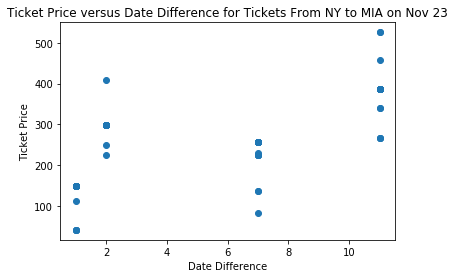

In [7]:
plt.scatter(pd_nov_23_flights['date difference'],pd_nov_23_flights['ticket price'])
plt.title("Ticket Price versus Date Difference for Tickets From NY to MIA on Nov 23")
plt.xlabel("Date Difference")
plt.ylabel("Ticket Price")
plt.show()